In [1]:
#libraries

import numpy as np
import matplotlib.pyplot as plt

# Numerical Projects and Exercises

2.1 **The Box Mueller method**

(a) Generate a sample of 10,000 pairs ($𝑍_1$, $𝑍_2$) following the Box-Mueller method given in equation (2.3).

In [2]:
U1 = np.random.uniform(0, 1, 10000)
U2 = np.random.uniform(0, 1, 10000)

# Generate Z1 and Z2
Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

(b) Plot the histogram for $𝑍_1$ and $𝑍_2$ and compare to the standard Gaussian distribution.

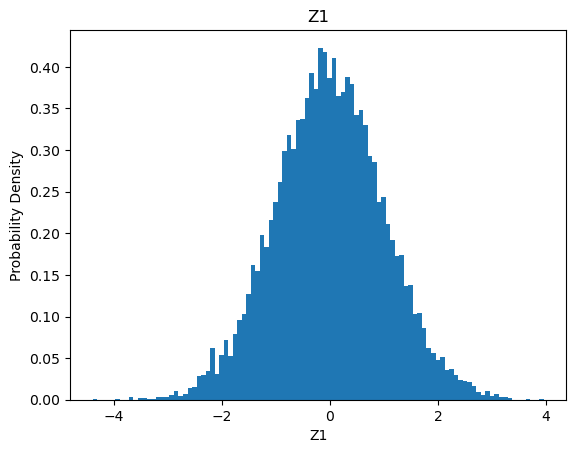

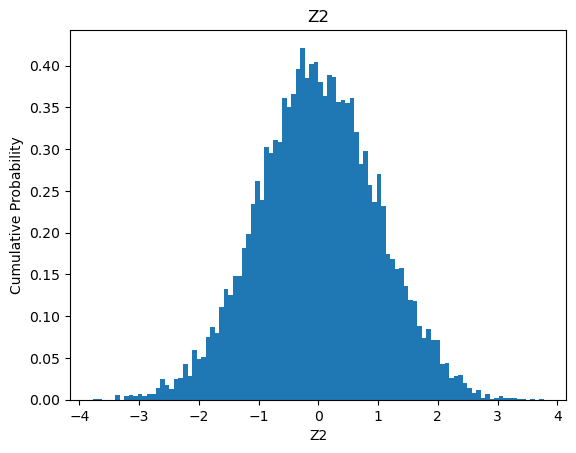

In [3]:
plt.hist(Z1, bins=100, density=True)
plt.xlabel('Z1')
plt.ylabel('Probability Density')
plt.title('Z1')
plt.show()

plt.hist(Z2, bins=100, density=True)
plt.xlabel('Z2')
plt.ylabel('Cumulative Probability')
plt.title('Z2')
plt.show()

(c) Estimate the covariance $E[𝑍_1𝑍_2]$ by computing the empirical mean $E[𝑍_1𝑍_2] \approx \frac{1}{10,000} \sum_{j=1}^{10000}
Z_1^{(j)}Z_2^{(j)}$,
where 𝑗 indexes the sample.

In [4]:
Z = Z1*Z2
covariance = np.sum(Z)/10000
print(covariance)

0.0011235727044755916


2.2 **Simulating Brownian Motion** The goal of the project is to simulate 100 paths of Brownian motion on [0, 1] using a step size of 0.01 using the Cholesky decomposition as outlined in Example 2.30.

(a) Construct the covariance matrix of ($𝐵_{𝑗/100}$, 1 ≤ 𝑗 ≤ 100) using a for loop. Recall that for Brownian motion 𝒞(𝑠, 𝑡) = 𝑠 ∧ 𝑡 with mean 0.

In [9]:
C = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    C[i][j] = (min(i,j)+1) / 100
C
     

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.01, 0.02, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.01, 0.02, 0.03, ..., 0.98, 0.98, 0.98],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 0.99],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]])

(b) The command numpy.linalg.cholesky in Python gives the Cholesky decomposition of a covariance matrix 𝒞. Use this to find the matrix 𝐴.

In [10]:
A = np.linalg.cholesky(C)
A
   

array([[0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0. ],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

(c) Define a function using def whose output is a sample of 𝑁 standard Gaussian random variables and whose input is 𝑁.

In [11]:
def return_standard_gaussian(N):
  return np.random.standard_normal((N, 100))

(d) Use the above to plot 100 paths of Brownian motion on [0,1] with step size of 0.01. Do not forget 𝐵0!

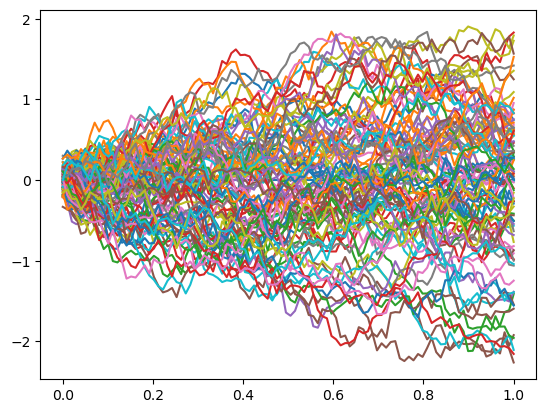

In [18]:
Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, X[i])



2.3 **Simulating the Ornstein-Uhlenbeck process** Follow the same steps as Project 2.2 to generate 100 paths with step size of 0.01 of the following processes on [0,1]:

(a) Ornstein-Uhlenbeck process: $𝒞(𝑠, 𝑡) = \frac{𝑒^{−2(𝑡−𝑠)}}{2}  (1 − 𝑒^{−2𝑠})$, for 𝑠 ≤ 𝑡, with mean 0 (so that $𝑌_0 = 0$).

[[0.00990066 0.00970462 0.00951245 ... 0.00142276 0.00139459 0.00136698]
 [0.00970462 0.01960528 0.01921707 ... 0.00287427 0.00281736 0.00276157]
 [0.00951245 0.01921707 0.02911773 ... 0.0043551  0.00426886 0.00418433]
 ...
 [0.00142276 0.00287427 0.0043551  ... 0.42957079 0.42106472 0.41272708]
 [0.00139459 0.00281736 0.00426886 ... 0.42106472 0.43096538 0.4224317 ]
 [0.00136698 0.00276157 0.00418433 ... 0.41272708 0.4224317  0.43233236]]
[[0.09950208 0.         0.         ... 0.         0.         0.        ]
 [0.0975318  0.10046307 0.         ... 0.         0.         0.        ]
 [0.09560054 0.09847376 0.10139619 ... 0.         0.         0.        ]
 ...
 [0.01429884 0.01472858 0.01516569 ... 0.13494698 0.         0.        ]
 [0.01401571 0.01443694 0.01486539 ... 0.13227486 0.13504926 0.        ]
 [0.01373818 0.01415107 0.01457103 ... 0.12965564 0.13237511 0.13514944]]


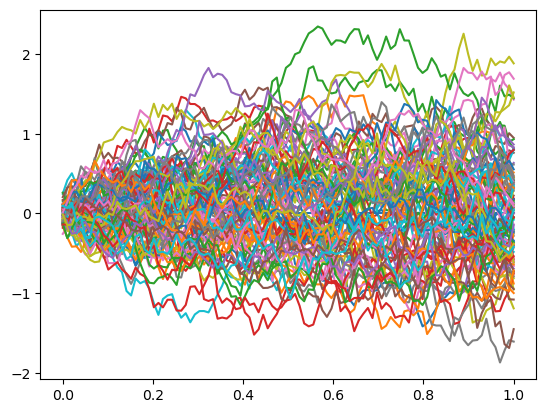

In [33]:
def covariance_function(s, t):
    return (np.exp(-2 * np.abs(t - s))/2) * (1 - np.exp(-2 * np.minimum(s, t)))

i_values = np.linspace(0.01, 1.0, num=100)
j_values = np.linspace(0.01, 1.0, num=100)

C = np.zeros((100,100))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    
print(C)

A = np.linalg.cholesky(C)
print(A)

Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, X[i])

(b) Stationary Ornstein-Uhlenbeck process: $𝒞(𝑠, 𝑡) = \frac{𝑒^{−2(𝑡−𝑠)}}{2}$ , for 𝑠 ≤ 𝑡, with mean 0 (so that $𝑌_0$ is a Gaussian random variable of mean 0 and variance 1/2).

[[0.5        0.49009934 0.48039472 ... 0.07185197 0.07042921 0.06903462]
 [0.49009934 0.5        0.49009934 ... 0.07330348 0.07185197 0.07042921]
 [0.48039472 0.49009934 0.5        ... 0.07478431 0.07330348 0.07185197]
 ...
 [0.07185197 0.07330348 0.07478431 ... 0.5        0.49009934 0.48039472]
 [0.07042921 0.07185197 0.07330348 ... 0.49009934 0.5        0.49009934]
 [0.06903462 0.07042921 0.07185197 ... 0.48039472 0.49009934 0.5       ]]
[[0.70710678 0.         0.         ... 0.         0.         0.        ]
 [0.69310513 0.14001886 0.         ... 0.         0.         0.        ]
 [0.67938073 0.1372463  0.14001886 ... 0.         0.         0.        ]
 ...
 [0.10161404 0.02052774 0.02094243 ... 0.14001886 0.         0.        ]
 [0.09960194 0.02012126 0.02052774 ... 0.1372463  0.14001886 0.        ]
 [0.09762969 0.01972284 0.02012126 ... 0.13452864 0.1372463  0.14001886]]


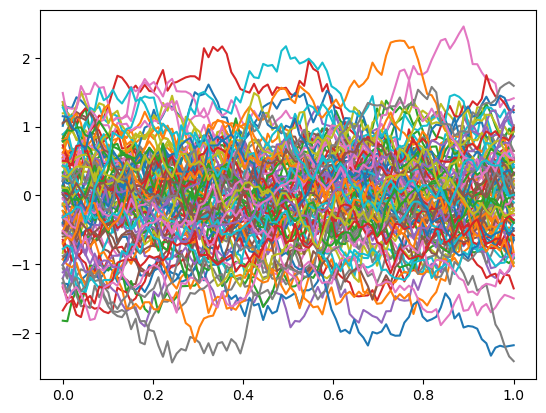

In [34]:
def covariance_function(s, t):
    return (np.exp(-2 * np.abs(t - s))/2)

i_values = np.linspace(0.01, 1.0, num=100)
j_values = np.linspace(0.01, 1.0, num=100)

C = np.zeros((100,100))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    
print(C)

A = np.linalg.cholesky(C)
print(A)

Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, X[i])

2.4 **Simulating fractional Brownian motion** Follow the same steps as Project 2.2 to generate 100 paths with step size of 0.01 of fractional Brownian on [0, 1] with Hurst index 𝐻 = 0.1, 𝐻 = 0.5, and 𝐻 = 0.9.

[[0.39810717 0.22865253 0.21836827 ... 0.20007405 0.20006576 0.20005761]
 [0.22865253 0.45730505 0.27756615 ... 0.23070191 0.23068516 0.23066872]
 [0.21836827 0.27756615 0.49593442 ... 0.25105412 0.25102877 0.25100387]
 ...
 [0.20007405 0.23070191 0.25105412 ... 0.99596761 0.7979262  0.76933128]
 [0.20006576 0.23068516 0.25102877 ... 0.7979262  0.99799195 0.79994239]
 [0.20005761 0.23066872 0.25100387 ... 0.76933128 0.79994239 1.        ]]
[[0.63095734 0.         0.         ... 0.         0.         0.        ]
 [0.36238983 0.57094541 0.         ... 0.         0.         0.        ]
 [0.34609038 0.26648172 0.55239783 ... 0.         0.         0.        ]
 ...
 [0.317096   0.20280318 0.15797837 ... 0.52662772 0.         0.        ]
 [0.31708285 0.20278219 0.15795082 ... 0.18158991 0.5266231  0.        ]
 [0.31706994 0.20276159 0.15792379 ... 0.14915043 0.18157917 0.52661858]]


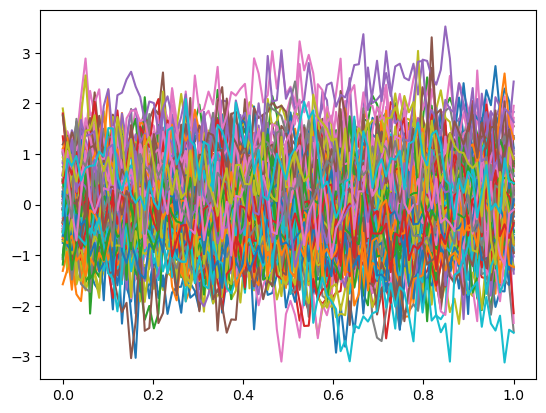

In [36]:
H = 0.1

def covariance_function(s, t):
    return 0.5*(t**(2*H) + s**(2*H) - (np.abs(s-t))**(2*H))

i_values = np.linspace(0.01, 1.0, num=100)
j_values = np.linspace(0.01, 1.0, num=100)

C = np.zeros((100,100))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    
print(C)

A = np.linalg.cholesky(C)
print(A)

Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, X[i])

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.02 0.02 ... 0.02 0.02 0.02]
 [0.01 0.02 0.03 ... 0.03 0.03 0.03]
 ...
 [0.01 0.02 0.03 ... 0.98 0.98 0.98]
 [0.01 0.02 0.03 ... 0.98 0.99 0.99]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]]
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.  0.  0. ]
 ...
 [0.1 0.1 0.1 ... 0.1 0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


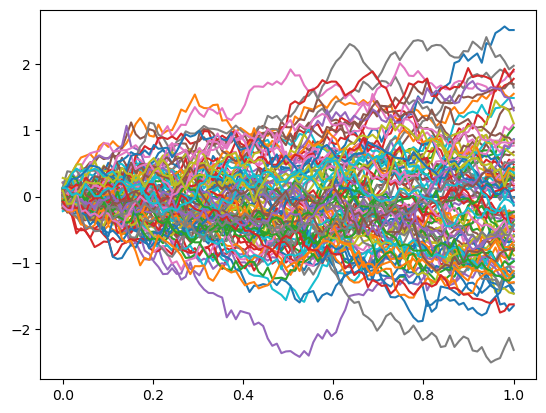

In [37]:
H = 0.5

def covariance_function(s, t):
    return 0.5*(t**(2*H) + s**(2*H) - (np.abs(s-t))**(2*H))

i_values = np.linspace(0.01, 1.0, num=100)
j_values = np.linspace(0.01, 1.0, num=100)

C = np.zeros((100,100))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    
print(C)

A = np.linalg.cholesky(C)
print(A)

Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, X[i])

[[2.51188643e-04 4.37344830e-04 5.95627529e-04 ... 8.94513357e-03
  9.01742523e-03 9.08957025e-03]
 [4.37344830e-04 8.74689659e-04 1.21912854e-03 ... 1.80039832e-02
  1.81487150e-02 1.82931517e-02]
 [5.95627529e-04 1.21912854e-03 1.81475607e-03 ... 2.71485252e-02
  2.73658473e-02 2.75827241e-02]
 ...
 [8.94513357e-03 1.80039832e-02 2.71485252e-02 ... 9.64288386e-01
  9.73054623e-01 9.81706848e-01]
 [9.01742523e-03 1.81487150e-02 2.73658473e-02 ... 9.73054623e-01
  9.82072048e-01 9.90910430e-01]
 [9.08957025e-03 1.82931517e-02 2.75827241e-02 ... 9.81706848e-01
  9.90910430e-01 1.00000000e+00]]
[[0.01584893 0.         0.         ... 0.         0.         0.        ]
 [0.02759459 0.01064087 0.         ... 0.         0.         0.        ]
 [0.03758156 0.01711146 0.01046808 ... 0.         0.         0.        ]
 ...
 [0.56439977 0.22832733 0.19396966 ... 0.01012276 0.         0.        ]
 [0.56896107 0.23010018 0.19545661 ... 0.01545864 0.01012267 0.        ]
 [0.57351311 0.23186929 0.1969

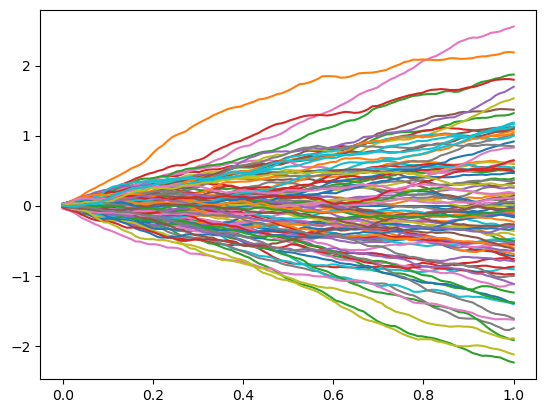

In [38]:
H = 0.9

def covariance_function(s, t):
    return 0.5*(t**(2*H) + s**(2*H) - (np.abs(s-t))**(2*H))

i_values = np.linspace(0.01, 1.0, num=100)
j_values = np.linspace(0.01, 1.0, num=100)

C = np.zeros((100,100))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    
print(C)

A = np.linalg.cholesky(C)
print(A)

Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, X[i])

2.5 **Simulating the Brownian bridge**

(a) Follow the steps of Project 2.2 to generate 100 paths with step size of 0.01 of Brownian bridge on [0, 1]: 𝒞(𝑠, 𝑡) = 𝑠(1 − 𝑡) for 𝑠 ≤ 𝑡 with mean 0. Hint: Be careful because the variance is 0 at time 0 and 1 here.

(99, 99)
(99, 99)


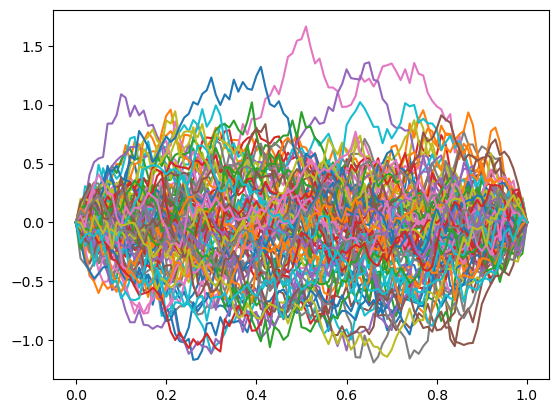

In [60]:
def covariance_function(s, t):
    return min(s,t)*(1-max(s,t))

i_values = np.linspace(0.01, 0.99, num=99)
j_values = np.linspace(0.01, 0.99, num=99)

np.random.seed(44)

C = np.zeros((99,99))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    
print(C.shape)

A = np.linalg.cholesky(C)
print(A.shape)

Z = return_standard_gaussian(100)
Z = Z[:99]

X1 = np.dot(A,Z)
X0 = np.zeros((1,100))

X_a = np.vstack([X0, X1, X0])
X_a = np.transpose(X_a)

x = np.linspace(0.0, 1.0, num=101)
for i in range(100):
  plt.plot(x, X_a[i])

(b) Another way to construct a Brownian bridge is to use equation (2.8). Generate 100 paths this way using Brownian paths.

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.02 0.02 ... 0.02 0.02 0.02]
 [0.01 0.02 0.03 ... 0.03 0.03 0.03]
 ...
 [0.01 0.02 0.03 ... 0.98 0.98 0.98]
 [0.01 0.02 0.03 ... 0.98 0.99 0.99]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]]
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.  0.  0. ]
 ...
 [0.1 0.1 0.1 ... 0.1 0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


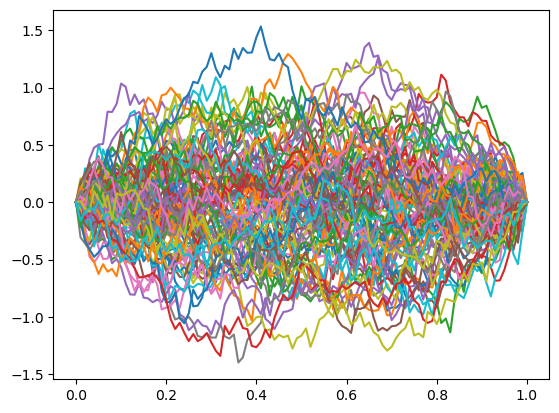

In [61]:
C = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    C[i][j] = (min(i,j)+1) / 100
print(C)

np.random.seed(44)

A = np.linalg.cholesky(C)
print(A)

Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((1,100))

X_b = np.vstack([X0, X1])
X_b = np.transpose(X_b)
B = X_b

for i in range (100):
  for j in range(101):
    X_b[i][j] = B[i][j] - j/100 * B[i][-1]

x = np.linspace(0.0, 1.0, num=101)
for i in range(100):
  plt.plot(x, X_b[i])



(c) Compare a single path of Brownian bridge constructed in (a) and in (b) using the same source of randomness, that is, the same sample of IID standard Gaussians. What do you notice? To work with the same random sample, the command np.random.seed could
be useful.

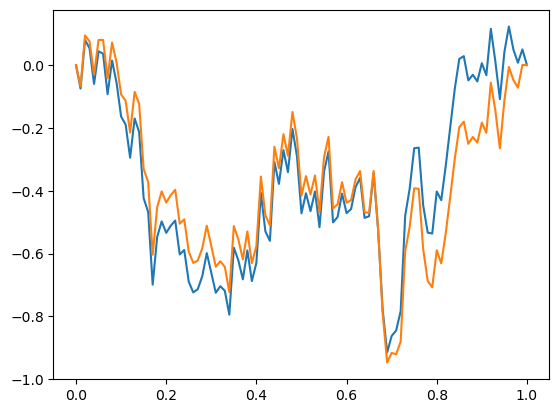

In [64]:
plt.plot(x, X_a[0])
plt.plot(x, X_b[0])


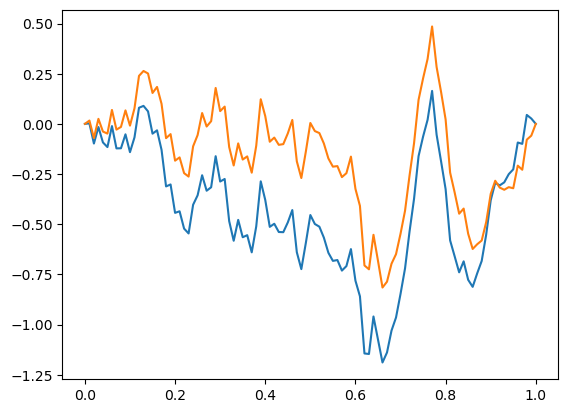

In [63]:
plt.plot(x, X_a[27])
plt.plot(x, X_b[27])